# 5. Finance Fundamentals

Overview of contents:
- 5.1 Portfolio and Shape Ratio
- 5.2 Portfolio Optimization
- 5.3 Financial Tools and Concepts
- 5.4 CAMP Model
- 5.5 Value of a Company

## 5.4 CAPM Model = Capital Assets Pricing Model

- One of the most fundamental models in investing
- A portfolio is a set of weighted securities which yield a return
- The return of a portfolio is then:

$r_p(t) = \sum_{i}^{n} w_i r_i(t)$

- We can imagine the entire market as a portfolio, for example the S&P500; then, the company weights would be

$w_i = \frac{MarketCap_i}{\sum_j^n MarketCap_j}$

- The market cap of a company is `num_shares * price_share`
- The CAPM model describes the linear relationship between the returns of a stock and the market

$r_i(t) = \beta_i r_m(t) + \alpha_i$

- If we have a scatterplot with the daily returns of the market and a the ones of a stock, the line that fits in the plot has the `beta` and `alpha` coefficients.
- CAPM says
    - `beta` is the multiplication/scaling of the market return in our stock
    - `alpha` is a residual term that will be tend to be 0; in fact, CAMPM states that `alpha` is random and cannot be predicted
- However, we are going to behave like active investors and are going to believe that we are able to modify/predict `alpha` values
- Therefore, if we take the `beta` of our portfolio and the individual `alpha` values of the stocks, the CAPM could be re-written as

$r_p(t) = \beta_p r_m(t) + \sum_{i}^{n} w_i \alpha_i$

- Notes on `alpha` and `beta`:
    - `beta` is the scaling factor of what the market does
    - low `beta` values are attractive, because they should operate independently of the market
    - high `beta` values mean more returns and more losses, i.e., higher risk
    - `alpha` is the intercept, thus, gains/losses independent from the market; although the CAPM says its real value is 0 (in practice, close to 0), traders assume that is not true and try to work on increasing the `alpha`
    - finding higher `alpha` values means hedging against volatility: the higher returns related to higher risks are traded off for increases average values with probably less jumps

In [7]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

In [17]:
# We get the SPIDER ETF, which tracks the entire S&P500
# That is our market series
spy_etf = web.DataReader('SPY','yahoo')

In [18]:
# We have a look at where it starts and ends
# To grab the same period for selected stocks
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-27,209.809998,208.050003,208.470001,209.350006,77329400.0,190.433411
2016-04-28,209.759995,206.960007,208.460007,207.449997,97216200.0,188.705063
2016-04-29,207.130005,205.029999,206.720001,206.330002,142424100.0,187.686279
2016-05-02,208.179993,206.410004,206.919998,207.970001,62188000.0,189.178101
2016-05-03,206.800003,205.279999,206.520004,206.160004,106422100.0,187.531647


In [19]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,416.739990,413.790009,416.260010,415.209991,78498500.0,415.209991
2021-04-20,415.089996,410.589996,413.910004,412.170013,81851800.0,412.170013
2021-04-21,416.290009,411.359985,411.510010,416.070007,66793000.0,416.070007
2021-04-22,416.779999,411.130005,415.890015,412.269989,97582800.0,412.269989
2021-04-23,418.250000,412.790009,412.869995,416.739990,73209200.0,416.739990


In [20]:
start = pd.to_datetime('2016-04-27')
end = pd.to_datetime('2021-04-23')

In [21]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [22]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-27,24.677500,23.920000,24.000000,24.455000,458408400.0,22.745811
2016-04-28,24.469999,23.562500,24.402500,23.707500,328970800.0,22.050558
2016-04-29,23.680000,23.127501,23.497499,23.434999,274126000.0,21.797100
2016-05-02,23.520000,23.100000,23.492500,23.410000,192640400.0,21.773848
2016-05-03,23.934999,23.420000,23.549999,23.795000,227325200.0,22.131937


In [23]:
import matplotlib.pyplot as plt

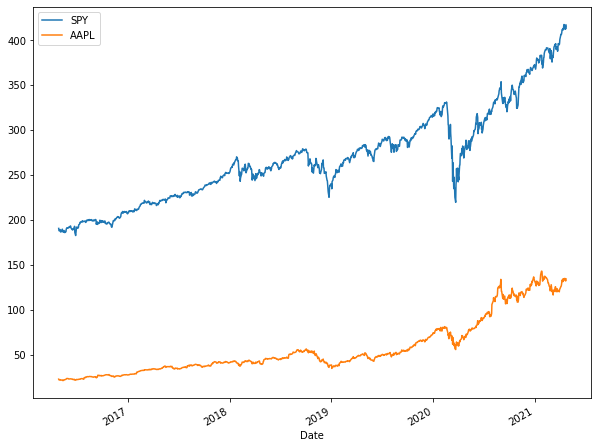

In [29]:
# We plot both market and stock
spy_etf['Adj Close'].plot(figsize=(10,8),label='SPY')
aapl['Adj Close'].plot(figsize=(10,8),label='AAPL')
plt.legend()

In [30]:
# Cumulative returns for every day
spy_etf['Cumulative Return'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]
aapl['Cumulative Return'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]

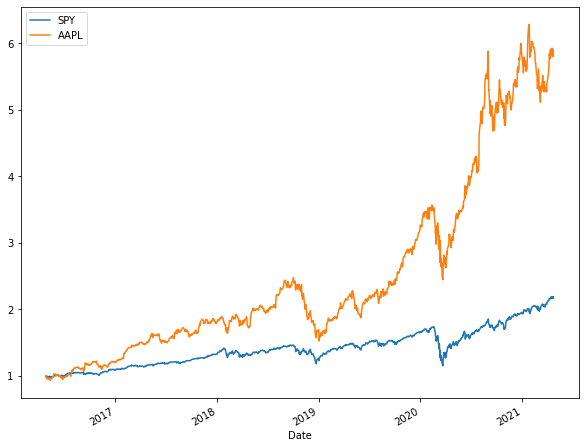

In [31]:
# Plot cumulative return
spy_etf['Cumulative Return'].plot(figsize=(10,8),label='SPY')
aapl['Cumulative Return'].plot(figsize=(10,8),label='AAPL')
plt.legend()

In [32]:
# Daily return
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)

Text(0, 0.5, 'AAPL daily return')

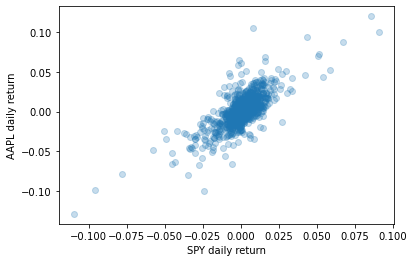

In [58]:
# Plot daily return: SCATTERPLOT
plt.scatter(spy_etf['Daily Return'],aapl['Daily Return'],alpha=0.25)
plt.xlabel('SPY daily return')
plt.ylabel('AAPL daily return')

In [43]:
# Compute alpha and beta values with linear regression
result = stats.linregress(x=spy_etf['Daily Return'].iloc[1:],y=aapl['Daily Return'].iloc[1:])

In [44]:
result

LinregressResult(slope=1.2109202635243175, intercept=0.0007560023285205499, rvalue=0.7513930545477042, pvalue=1.1612225635329088e-228, stderr=0.0300294959426919, intercept_stderr=0.0003555869065306641)

In [45]:
# We unpack the result values
# Slope: beta
# Intercept: alpha
beta,alpha,r_value,p_value,std_err = result

In [46]:
# Every market move is scaled with beta to yield our stock moves
beta

1.2109202635243175

In [50]:
# According to CAPM, alpha -> 0
# We see it is not really 0, but it has some residual value
# Even small alpha values can mean a difference:
# that is the return offset we have wrt market
alpha

0.0007560023285205499

In [51]:
r_value

0.7513930545477042

In [68]:
p_value

1.1612225635329088e-228

In [ ]:
# It is important to be aware of the R^2 and p values of the regression
# as well as the mean and std. dev. values of our returns

In [70]:
spy_etf['Daily Return'].describe()

count    1256.000000
mean        0.000694
std         0.011826
min        -0.109424
25%        -0.002852
50%         0.000733
75%         0.005519
max         0.090603
Name: Daily Return, dtype: float64

In [71]:
# AAPL (stock) has larger mean and std. dev. than SPY (market)
aapl['Daily Return'].describe()

count    1256.000000
mean        0.001596
std         0.019058
min        -0.128647
25%        -0.006201
50%         0.001119
75%         0.010262
max         0.119808
Name: Daily Return, dtype: float64

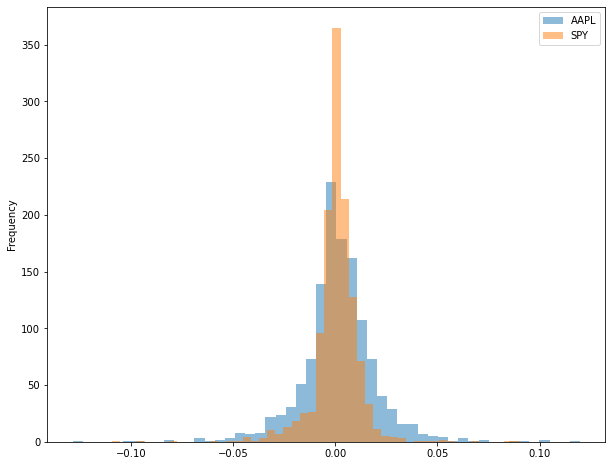

In [75]:
# We should also plot overlapping histograms
# We see the stock (AAPL) profile is fatter/wider
aapl['Daily Return'].plot(kind='hist',figsize=(10,8),label='AAPL',bins=50,alpha=0.5)
spy_etf['Daily Return'].plot(kind='hist',figsize=(10,8),label='SPY',bins=50,alpha=0.5)
plt.legend()

### Hedging

The goal is to isolate the `alpha` value of an asset (see notes on `alpha` and `beta` above).
Picking stocks with high values of `alpha` and low values of `beta` into our portfolio is **hedging**: it is a risk-reward tradeoff, becauses it reduces potential losses, but it chips aways potential gains too; it is a kind of an insurance we are paying to protect against possible losses.
Note, however,that we cannot assume historical `alpha` and `beta` values remain constant or in trend in the future.

Hedging are also implemented in practice through derivatives: options, swaps, futures and forward contracts. When buying derivatives we are paying an extra insurance to cut losses. Derivative hedges are measured in terms of `delta` = hedge ratio = the amount a derivative price moves divided by the amount of the movement of the underlying asset.

A diversified portfolio is considered also a way of hedging.

In [78]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as web

In [77]:
start = '2016-01-01'
end = '2017-01-01'

In [81]:
# Asset: Apple
asset = web.DataReader('AAPL','yahoo',start=start,end=end)

In [82]:
asset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154


In [84]:
# Benchmark: SPY = SP500 ETF
benchmark = web.DataReader('SPY','yahoo',start=start,end=end)

In [85]:
asset_ret = asset['Adj Close'].pct_change(1)[1:]

In [86]:
benchmark_ret = benchmark['Adj Close'].pct_change(1)[1:]

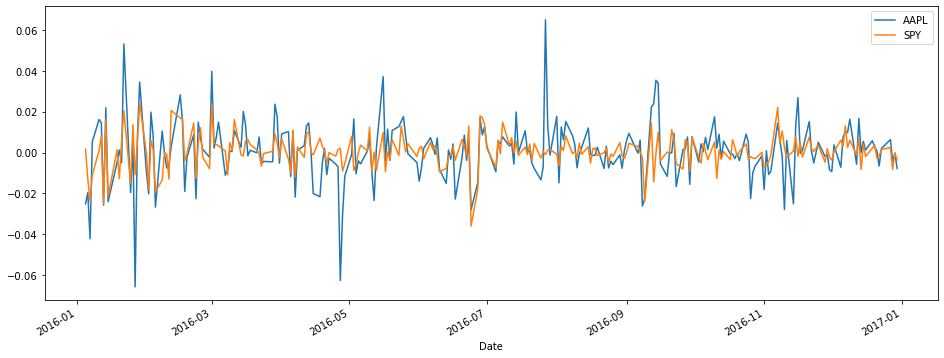

In [89]:
# We should always plot the returns along time
# Most of the time, the asset follows the market in scaled manner
# But sometimes there are independent jumps up or down
# Those jumps are related to the alpha
# the more in one direction (up/down), the more significant the effect of alpha
asset_ret.plot(label='AAPL',figsize=(16,6))
benchmark_ret.plot(label='SPY',figsize=(16,6))
plt.legend()

Text(0, 0.5, 'Asset: AAPL')

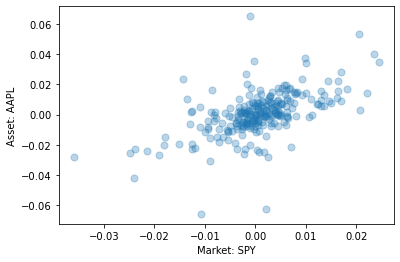

In [96]:
plt.scatter(benchmark_ret,asset_ret,alpha=0.3,s=50)
plt.xlabel('Market: SPY')
plt.ylabel('Asset: AAPL')

In [97]:
# We extract the values to run a regression
AAPL = asset_ret.values
SPY = benchmark_ret.values

In [102]:
# We add a column of 1s to an array
SPY_constant = sm.add_constant(SPY)

In [103]:
model = regression.linear_model.OLS(AAPL,SPY_constant).fit()

In [105]:
alpha,beta = model.params

In [106]:
# Intercept: alpha
alpha

1.9635710844644802e-05

In [107]:
# Slope: beta
beta

1.0235960006104954

Text(0, 0.5, 'Asset: AAPL')

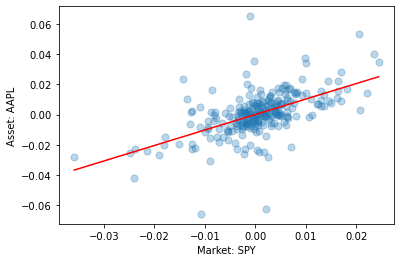

In [109]:
# Now we plot teh scatterplot with the line
min_SPY = benchmark_ret.values.min()
max_SPY = benchmark_ret.values.max()
SPY_line = np.linspace(min_SPY,max_SPY,100)
y = SPY_line*beta + alpha
plt.scatter(benchmark_ret,asset_ret,alpha=0.3,s=50)
plt.plot(SPY_line,y,c='red')
plt.xlabel('Market: SPY')
plt.ylabel('Asset: AAPL')

In [110]:
# We can substract the variable part of the model from the measured asset price
# to obtain the hedged value
# y = beta*market + alpha
# asset = (approx.) = y
# hedge = asset - beta*market
# hedge: residual after substracting the variable component
hedged = -1*(beta*benchmark_ret) + asset_ret

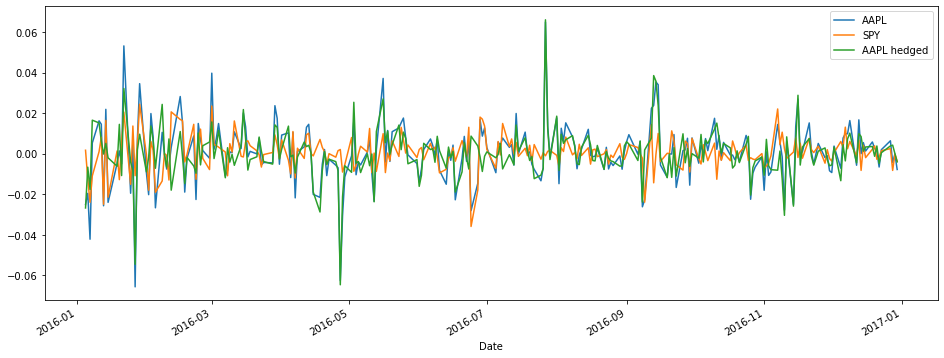

In [111]:
# Plot
# Look for big drops in the market and zoom in there
asset_ret.plot(label='AAPL',figsize=(16,6))
benchmark_ret.plot(label='SPY',figsize=(16,6))
hedged.plot(label='AAPL hedged',figsize=(16,6))
plt.legend()

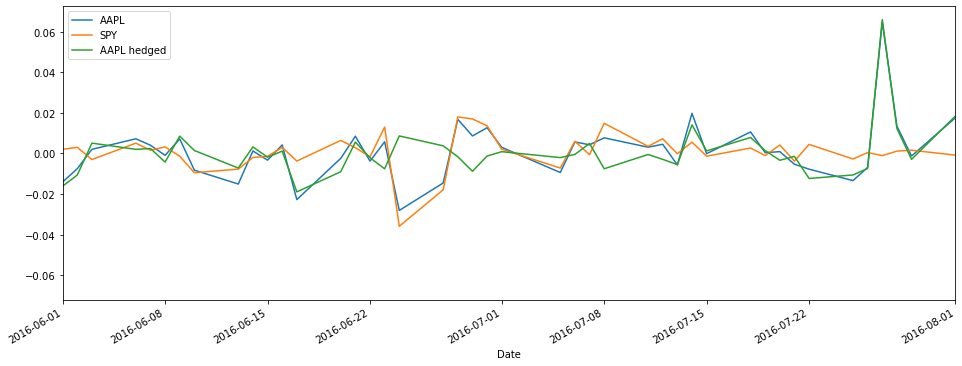

In [112]:
# Plot a period with a big drop in the market
# We see that the hedged value does not go down
# when there is a market or asset drop
# That is the point of hedging
asset_ret.plot(label='AAPL',figsize=(16,6))
benchmark_ret.plot(label='SPY',figsize=(16,6))
hedged.plot(label='AAPL hedged',figsize=(16,6))
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

In [113]:
# We can create a function that computes
# the alpha and beta values
# and then use it to compute alpha and beta of several stocks
# in several periods of time
# Then, 
def alpha_beta(benchmark_ret, asset_ret):
    asset = asset_ret.values
    becnhmark = benchmark_ret.values
    benchmark_constant = sm.add_constant(benchmark)
    model = regression.linear_model.OLS(asset,benchmark_constant).fit()
    return model.params[0],model.params[1]